## Supuestos estructurales del Modelo Clásico de Regresión Lineal (MCRL)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [3]:
data=pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Econometría Avanzada\Advanced-Econometrics-MSc-\Bases de datos\GujaratiPorter71.txt", delimiter="\t")
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


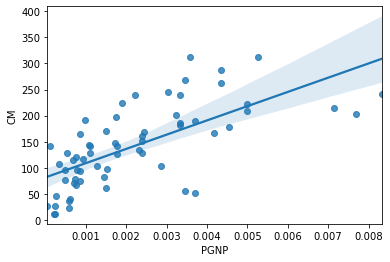

In [6]:
sns.regplot(x = 1/data["PGNP"], y = data["CM"]);

**Supuesto #6: Observaciones mayores a parámetros**

In [7]:
data.shape

(64, 4)

In [9]:
data[["PGNP","FLR","TFR"]][0:3]

,PGNP,FLR,TFR
0,1870,37,6.66
1,130,22,6.15
2,310,16,7.00


In [10]:
modelo_prueba=sm.OLS(data["CM"][0:3], sm.add_constant(data[["PGNP","FLR","TFR"]][0:3]))
resultado_prueba=modelo_prueba.fit()
print(resultado_prueba.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 01 Apr 2023   Prob (F-statistic):                nan
Time:                        10:00:06   Log-Likelihood:                 66.188
No. Observations:                   3   AIC:                            -126.4
Df Residuals:                       0   BIC:                            -129.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2453        inf          0        n

C:\Users\57317\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\57317\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


**Supuesto #7: Variabilidad en las variables**

In [12]:
sm.add_constant(data).apply(np.std,axis=0)

const       0.000000
CM         75.382151
FLR        25.803873
PGNP     2704.317439
TFR         1.497158
dtype: float64

In [16]:
pd.DataFrame(sm.add_constant(data).apply(np.std,axis=0),columns=["Desviación Estándar"])

,Desviación Estándar
const,0.000000
CM,75.382151
FLR,25.803873
PGNP,2704.317439
TFR,1.497158


**Supuesto #8: Multicolinealidad**

In [17]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


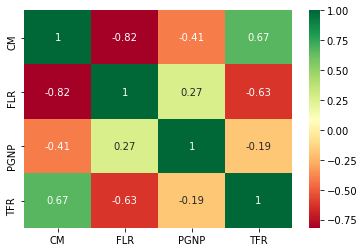

In [20]:
correlaciones = data.corr()
fig,ax = plt.subplots()
sns.heatmap(correlaciones, cmap = "RdYlGn", annot= True)
plt.show()

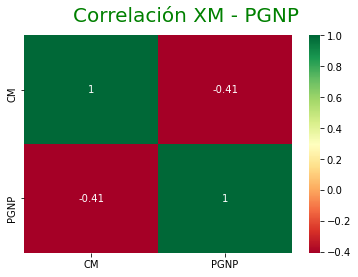

In [22]:
correlaciones=data[["CM","PGNP"]].corr()
fig,ax=plt.subplots()
fig.suptitle("Correlación XM - PGNP", fontsize = 20, color = "green")
sns.heatmap(correlaciones, cmap = "RdYlGn", annot= True)
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Nombre"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
print(vif_data)

  Nombre        VIF
0     CM  12.465787
1    FLR   3.937469
2   PGNP   1.494594
3    TFR  20.210255


**Supuesto de no sesgo de especificación**

In [26]:
data["1/PGNP"] = 1/data["PGNP"]
data.head()

,CM,FLR,PGNP,TFR,1/PGNP
0,128,37,1870,6.66,0.000535
1,204,22,130,6.15,0.007692
2,202,16,310,7.00,0.003226
3,197,65,570,6.25,0.001754
4,96,76,2050,3.81,0.000488


In [28]:
Y = data["CM"]
X = data[["1/PGNP","FLR","TFR"]]

In [29]:
modelo1=sm.OLS(Y,sm.add_constant(X))
resultados1=modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     64.45
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           9.38e-19
Time:                        10:30:32   Log-Likelihood:                -321.36
No. Observations:                  64   AIC:                             650.7
Df Residuals:                      60   BIC:                             659.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.8459     36.462      2.793      0.0

In [30]:
valores_estimados=resultados1.predict()
residuos = resultados1.resid

In [34]:
# Prueba CUSUM para medir cambio estructural 
# (para probar si los coeficientes en un modelo son constantes)


# H0: NO hay cambio estructural -> p-value > 0.05, NO rechazo H0
resultados_CUSUM = sms.breaks_cusumolsresid(residuos)
print(resultados_CUSUM)

(0.47787959725029483, 0.9763618038245581, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [36]:
# Para evaluar si la forma funcional es la correcta se utiliza el test de RESET de Ramsey

resultados_RESET = sms.linear_reset(resultados1)
estadistico = resultados_RESET.statistic
p_valor = resultados_RESET.pvalue

nombres = ["Estadístico","p-valor"]
pd.DataFrame([float(estadistico),float(p_valor)], index = nombres , columns = ["Reset"])
# P-value mayor a 0.05 -> Tiene una forma funcional correcta

,Reset
Estadístico,1.016879
p-valor,0.601433


## Ejercicio

Realice un modelo de regresión lineal con la base de datos Ingreso_Ahorro; adicionalmente, verifique el cumplimiento de los supuesto vistos en clase.

Este archivo de datos contiene información sobre 26 automóviles, a saber, su marca, precio, millas por galón, calificación de reparación (en 1978), peso en libras, longitud en pulgadas y si el automóvil era extranjero o nacional. Aquí está el archivo de datos.

In [37]:
datos_ejercicio=pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Econometría Avanzada\Advanced-Econometrics-MSc-\Bases de datos\regression_auto.csv")
datos_ejercicio.head()

,make,mpg,weight,weight1,price,foreign,repairs,length
0,AMC,22,2930,2.93,4099,0,3,186
1,AMC,17,3350,3.35,4749,0,3,173
2,AMC,22,2640,2.64,3799,0,3,168
3,Audi,17,2830,2.83,9690,1,5,189
4,Audi,23,2070,2.07,6295,1,3,174


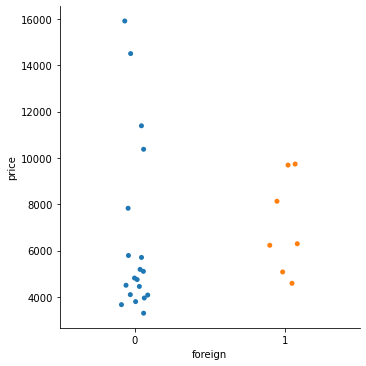

In [41]:
sns.catplot(x="foreign", y="price", data=datos_ejercicio);

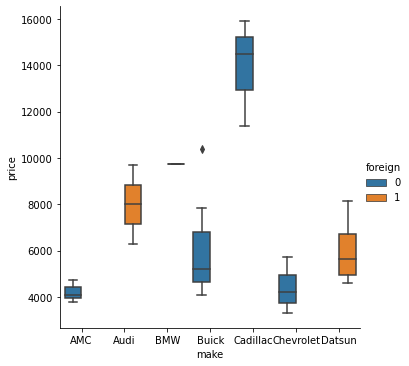

In [46]:
sns.catplot(x="make", y="price", hue="foreign", kind="box", data=datos_ejercicio);

### Modificación de bases de datos

In [49]:
datos_modificados = datos_ejercicio.loc[(datos_ejercicio["foreign"] == 1) & (datos_ejercicio["repairs"]>4)]
datos_modificados

,make,mpg,weight,weight1,price,foreign,repairs,length
3,Audi,17,2830,2.83,9690,1,5,189
23,Datsun,35,2020,2.02,4589,1,5,165
